# **SALES ANALYSIS**

In [5]:
import pandas as pd

#### **Task1#** : Merging 12 months of sales data into a single file

In [6]:
all_df=pd.read_csv("data/Sales_Data/"+"Sales_April_2019.csv")
all_df.shape

(18383, 6)

In [7]:
for i in ['January','February','March','May','June','July','August','September','October','November','December']:
    df_month=pd.read_csv("data/Sales_Data/"+"Sales_"+i+"_2019.csv")
    all_df=pd.concat([all_df,df_month])
all_df.shape

(186850, 6)

In [8]:
## Converting the data into a csv file
all_df.to_csv("data/Sales_Data/all_data.csv",index=False)
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### **Clean Up the data!**

#### **Drop NAN**

In [9]:
nan_df=all_df[all_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_df=all_df.dropna()

#### **Finding 'Or' as the month and removing those**

In [11]:
all_df[all_df['Order Date'].str[0:2]=='Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_df=all_df[all_df['Order Date'].str[0:2]!='Or']

#### **Task2#** : Augment data with additional columns

In [13]:
all_df['Month']=all_df['Order Date'].str[0:2]
all_df['Month']=all_df['Month'].astype('int32')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### **QUESTION 1: What was the best month for sales?How much was earned that month?**

In [14]:
all_df[['Price Each','Quantity Ordered','Month']].groupby('Month').sum().head()

,Price Each,Quantity Ordered
Month,,
1,70014.9511.99149.9911.992.99389.9911.9599.9915...,1121111111113111111111111211111111111112111111...
2,14.952.9911.95170014.953.847003.84389.9914.953...,1111111111211111111111111211111112411121111211...
3,2.992.9911.9999.99999.9911.9999.99999.9911.953...,1111111111111111211211111151211111111131111111...
4,11.9599.9960011.9911.9911.9599.9911.95170011.9...,2111111111111111111111111112111211111112131121...
5,150149.9970015060011.9515099.9915099.993.84150...,1111111111211111111111111111111121111111111111...


#### Converting the datatype to float from string

In [15]:
all_df[['Quantity Ordered']] = all_df[['Quantity Ordered']].astype('int32') 
all_df[['Price Each']] = all_df[['Price Each']].astype('float64')
all_df['Total_Price']=all_df['Quantity Ordered']*all_df['Price Each']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### **pd.to_numeric()**

In [16]:
## We can use pd.to_numeric to convert the datatype if we dont know the correct data type
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered']) 

In [17]:
results=all_df[['Total_Price','Month']].groupby('Month').sum()
results

,Total_Price
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [18]:
import matplotlib.pyplot as plt
results.plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

#### **QUESTION 2: What city had the highest number of sales?**

#### **Splitting the String using purchase address**

In [19]:
all_df['City']=all_df['Purchase Address'].str.split(",").apply(lambda x: x[1])
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [20]:
## groupby city and calculate the sales for each city
all_df['Sales']=all_df['Quantity Ordered']*all_df['Price Each']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99


In [21]:
results2=all_df[['Sales','City']].groupby('City').sum()
results2

,Sales
City,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


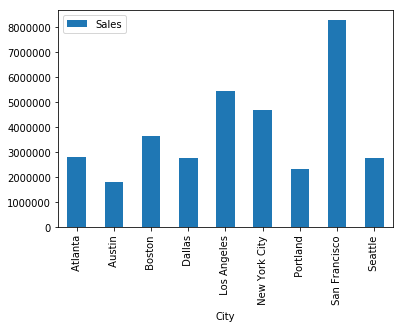

In [22]:
results2.plot(kind='bar')

#### **QUESTION 2: What time should we display advertisements to maximize likelihood of customer's buying product?**

##### **Using the pandas dateTime library to convert the date to dateTime Object**

In [23]:
all_df['Order Date']=pd.to_datetime(all_df['Order Date'])
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99


In [24]:
### extracting the hour from order date
all_df['hour']=all_df['Order Date'].dt.hour
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,City,Sales,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,11.99,9


In [25]:
all_df['hour']=all_df['hour'].astype('str')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 11 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
Month               185950 non-null int32
Total_Price         185950 non-null float64
City                185950 non-null object
Sales               185950 non-null float64
hour                185950 non-null object
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 20.6+ MB


In [26]:
results3=all_df[['Sales','hour']].groupby('hour').sum()
results3.head()

,Sales
hour,
0,713721.27
1,460866.88
10,1944286.77
11,2300610.24
12,2316821.34


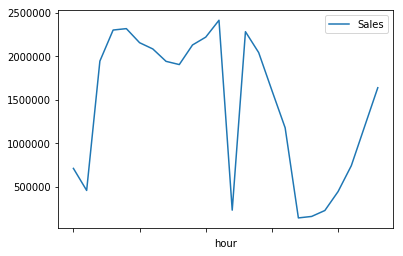

In [27]:
results3.plot()

In [28]:
### we can instead do a line plot as time is a continuous data
all_df.reset_index()
all_df=all_df.drop(['index'],axis=1)
all_df.head()

KeyError: "['index'] not found in axis"

In [ ]:
results4=all_df[['Sales','hour']].groupby('hour').count()
results4.index  ### to fetch the index values

In [ ]:
hours=[hour for hour,df in all_df.groupby('hour')]
hours

In [ ]:
plt.plot(results4.index,all_df[['Sales','hour']].groupby('hour').count())
plt.xticks()
plt.grid()
plt.show()

### So the peak time is right after 11 am and right before 7 pm

#### **QUESTION 4. What Products are most often sold together?**

In [ ]:
all_df['minute']=all_df['Order Date'].dt.minute
all_df.head()

In [ ]:
## if the orderid is same that means they are ordered together
results5=all_df[['Order ID','Product']].groupby('Order ID')
results6=pd.dataframe()
